In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
# read the file

df_2020 = pd.read_csv("C:/Users/Toomas/Desktop/ITMI_Data/Cleaned_datasets_25_64/Yearly/2020_cleaned_weights.csv")


In [3]:
df_2020.shape

(1737, 18)

In [4]:
df_2020

,survey_year,respondent_id,gender,age,age_group,ethnicity_estonian_nonestonian,education,income_per_household_member,chronic_disease,smoking_history,alcohol_standard_units_consumption_frequency,bmi,bmi_four_groups,bmi_two_groups_split25,bmi_two_groups_split30,exercising_frequency,work_physical_effort_level,weights
0,2020,1,1,29,1,1,1,2,2,1,3,23.515579,2,1,1,2,1,1.494
1,2020,2,1,29,1,1,1,1,1,4,4,24.968010,2,1,1,5,3,1.494
2,2020,3,1,29,1,1,3,3,2,2,2,23.515579,2,1,1,5,1,1.494
3,2020,4,1,29,1,2,3,1,2,1,1,27.777778,3,2,1,5,2,1.494
4,2020,5,1,29,1,1,4,3,2,1,2,23.735308,2,1,1,6,1,1.494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732,2020,1733,2,60,4,2,2,1,1,1,1,22.321429,2,1,1,2,2,0.798
1733,2020,1734,2,60,4,1,4,4,2,1,1,34.527089,4,2,2,3,1,0.798
1734,2020,1735,2,60,4,1,3,2,1,3,1,24.386526,2,1,1,6,1,0.798
1735,2020,1736,2,60,4,1,4,2,2,1,1,24.913495,2,1,1,5,1,0.798


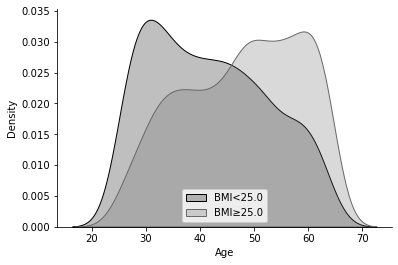

In [5]:
##density plot / age <=> bmi_two_groups_split25
ax = sns.kdeplot(df_2020.age[(df_2020['bmi_two_groups_split25'] == 1)],\
                 color='black', shade=True)
ax = sns.kdeplot(df_2020.age[(df_2020['bmi_two_groups_split25'] == 2)],\
                 color='dimgrey', shade=True)

ax.legend(['BMI<25.0', 'BMI≥25.0'], loc='lower center')
ax.set_ylabel('Density')
ax.set_xlabel('Age')
#ax.set_title('Age by BMI group')

sns.despine(top=True, right=True, left=False, bottom=False)

plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/EDA/density_age_BMI25.pdf")


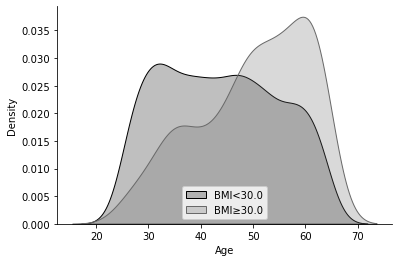

In [6]:
##density plot / age <=> bmi_two_groups_split30
ax = sns.kdeplot(df_2020.age[(df_2020['bmi_two_groups_split30'] == 1)],\
                 color='black', shade=True)
ax = sns.kdeplot(df_2020.age[(df_2020['bmi_two_groups_split30'] == 2)],\
                 color='dimgrey', shade=True)

ax.legend(['BMI<30.0', 'BMI≥30.0'], loc='lower center')
ax.set_ylabel('Density')
ax.set_xlabel('Age')
#ax.set_title('Age by BMI group')
sns.despine(top=True, right=True, left=False, bottom=False)

plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/EDA/density_age_BMI30.pdf")

<ipython-input-7-43b403bc05c7>:37: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([1,2], labels=['BMI<25.0', 'BMI≥25.0'], loc="lower center", fontsize = 15, bbox_to_anchor=(0.5,0))


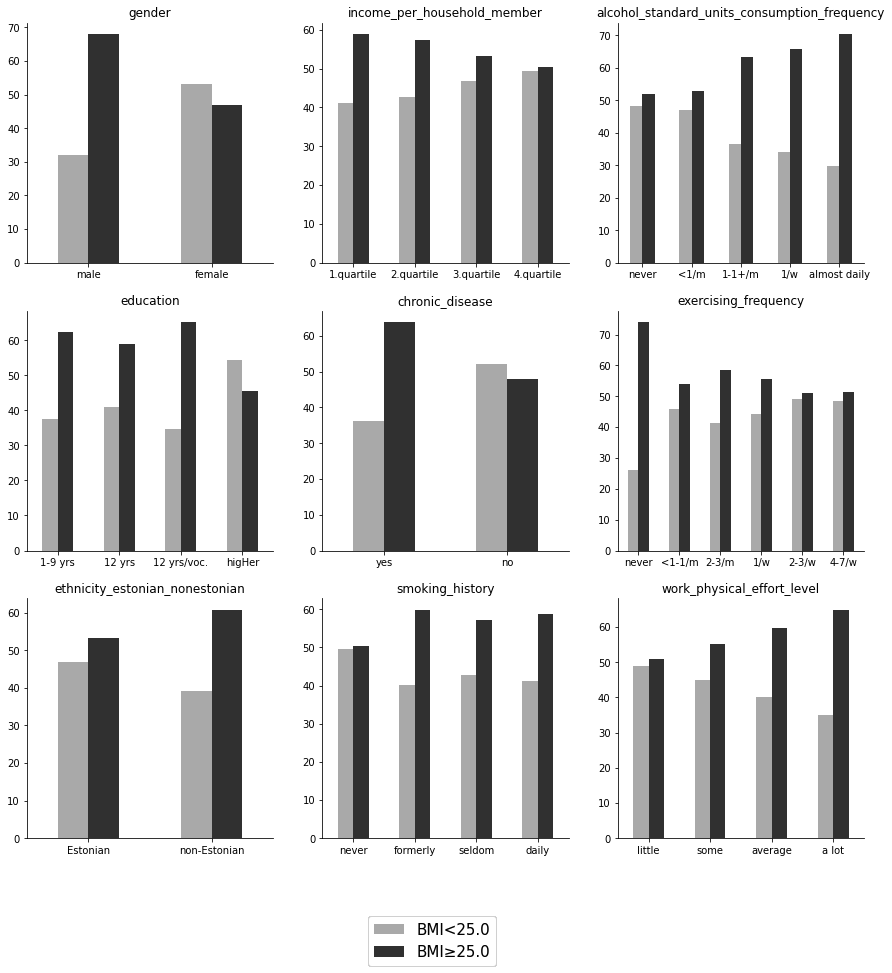

In [7]:
## different cateogries of respondents stratified by the proportion of those 
## who are overweight/obese (BMI ≥ 25.0)

## the plots show both "BMI < 25.0" and "BMI ≥ 25.0" categories

features=['gender',\
          'education',\
          'ethnicity_estonian_nonestonian',\
          'income_per_household_member',\
          'chronic_disease',\
          'smoking_history',\
          'alcohol_standard_units_consumption_frequency',\
          'exercising_frequency',\
          'work_physical_effort_level']

colors = ['#A9A9A9', '#303030']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (15,15))
sns.despine(top=True, right=True, left=False, bottom=False)

for i, item in enumerate(features):
    if i <3:    
        ax = df_2020.groupby(item).bmi_two_groups_split25.value_counts(normalize=True).\
        mul(100).round(4).sort_index(ascending=True).unstack().plot(kind='bar',ax=axes[i,0],rot=0,color=colors, legend=0)
        
    
    elif i >=3 and i <6:       
        ax = df_2020.groupby(item).bmi_two_groups_split25.value_counts(normalize=True).\
        mul(100).round(4).sort_index(ascending=True).unstack().plot(kind='bar',ax=axes[i-3,1],rot=0,color=colors, legend=0) 
  
    elif i <9:
        ax = df_2020.groupby(item).bmi_two_groups_split25.value_counts(normalize=True).\
        mul(100).round(4).sort_index(ascending=True).unstack().plot(kind='bar',ax=axes[i-6,2],rot=0,color=colors, legend=0)

    ax.set(xlabel=None)
    ax.set_title(item)    
    fig.legend([1,2], labels=['BMI<25.0', 'BMI≥25.0'], loc="lower center", fontsize = 15, bbox_to_anchor=(0.5,0))  
          

# changing the tick labels in all subplots
plt.sca(axes[0,0])
plt.xticks([0,1], ['male','female'])

plt.sca(axes[0,1])
plt.xticks([0,1,2,3], ['1.quartile','2.quartile', '3.quartile', '4.quartile'])

plt.sca(axes[0,2])
plt.xticks([0,1,2,3,4], ['never','<1/m','1-1+/m', '1/w', 'almost daily'])

plt.sca(axes[1,0])
plt.xticks([0,1,2,3], ['1-9 yrs','12 yrs','12 yrs/voc.','higHer'])

plt.sca(axes[1,1])
plt.xticks([0,1], ['yes','no'])

plt.sca(axes[1,2])
plt.xticks([0,1,2,3,4,5], ['never','<1-1/m', '2-3/m','1/w', '2-3/w','4-7/w'])

plt.sca(axes[2,0])
plt.xticks([0,1], ['Estonian','non-Estonian'])

plt.sca(axes[2,1])
plt.xticks([0,1,2,3], ['never','formerly','seldom','daily'])

plt.sca(axes[2,2])
plt.xticks([0,1,2,3], ['little','some','average','a lot'])

plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/EDA/category_subplots_split25_twobars.pdf")

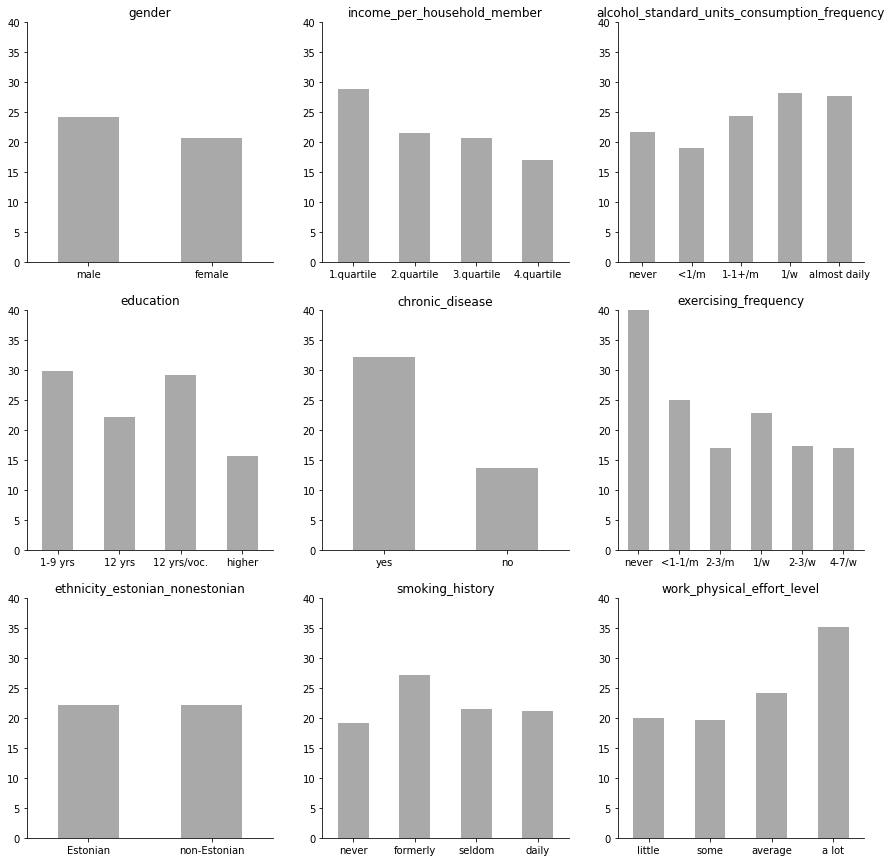

In [9]:
## different cateogries of respondents stratified by the proportion of those 
## who are obese (BMI ≥ 30.0)

## the plots show only "BMI ≥ 30.0" 

features=['gender',\
          'education',\
          'ethnicity_estonian_nonestonian',\
          'income_per_household_member',\
          'chronic_disease',\
          'smoking_history',\
          'alcohol_standard_units_consumption_frequency',\
          'exercising_frequency',\
          'work_physical_effort_level']


colors = ['#A9A9A9','#FFFFFF']

# temporary dataframe to reverses the stacks in the plot 
df_temp = df_2020
df_temp['bmi_two_groups_split30'] = df_temp['bmi_two_groups_split30'].replace([1],[3])

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (15,15))
sns.despine(top=True, right=True, left=False, bottom=False)


for i, item in enumerate(features):
    if i <3:    
        ax = df_temp.groupby(item).bmi_two_groups_split30.value_counts(normalize=True, ascending=True).\
        mul(100).round(4).unstack().plot(kind='bar', ax=axes[i,0],rot=0,color=colors, legend=0, stacked=True)
    
    elif i >=3 and i <6:       
        ax = df_temp.groupby(item).bmi_two_groups_split30.value_counts(normalize=True).\
        mul(100).round(4).sort_index(ascending=False).unstack().plot(kind='bar', ax=axes[i-3,1],rot=0,color=colors, legend=0, stacked=True) 
  
    elif i <9:
        ax = df_temp.groupby(item).bmi_two_groups_split30.value_counts(normalize=True).\
        mul(100).round(4).sort_index(ascending=True).unstack().plot(kind='bar', ax=axes[i-6,2],rot=0,color=colors, legend=0, stacked=True)

    
    ax.set(xlabel=None)
    ax.set_title(item)    
    #fig.legend([1,2], labels=['BMI≥30.0','BMI<30.0'], loc="lower center", fontsize = 15, bbox_to_anchor=(0.5,0))  
          

# changing the tick labels in all subplots
plt.sca(axes[0,0])
plt.xticks([0,1], ['male','female'])
plt.ylim(0, 40)

plt.sca(axes[0,1])
plt.xticks([0,1,2,3], ['1.quartile','2.quartile', '3.quartile', '4.quartile'])
plt.ylim(0, 40)

plt.sca(axes[0,2])
plt.xticks([0,1,2,3,4], ['never','<1/m','1-1+/m', '1/w', 'almost daily'])
plt.ylim(0, 40)

plt.sca(axes[1,0])
plt.xticks([0,1,2,3], ['1-9 yrs','12 yrs','12 yrs/voc.','higher'])
plt.ylim(0, 40)

plt.sca(axes[1,1])
plt.xticks([0,1], ['yes','no'])
plt.ylim(0, 40)

plt.sca(axes[1,2])
plt.xticks([0,1,2,3,4,5], ['never','<1-1/m', '2-3/m','1/w', '2-3/w','4-7/w'])
plt.ylim(0, 40)

plt.sca(axes[2,0])
plt.xticks([0,1], ['Estonian','non-Estonian'])
plt.ylim(0, 40)

plt.sca(axes[2,1])
plt.xticks([0,1,2,3], ['never','formerly','seldom','daily'])
plt.ylim(0, 40)

plt.sca(axes[2,2])
plt.xticks([0,1,2,3], ['little','some','average','a lot'])
plt.ylim(0, 40)

plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/EDA/category_subplots_split30.pdf")

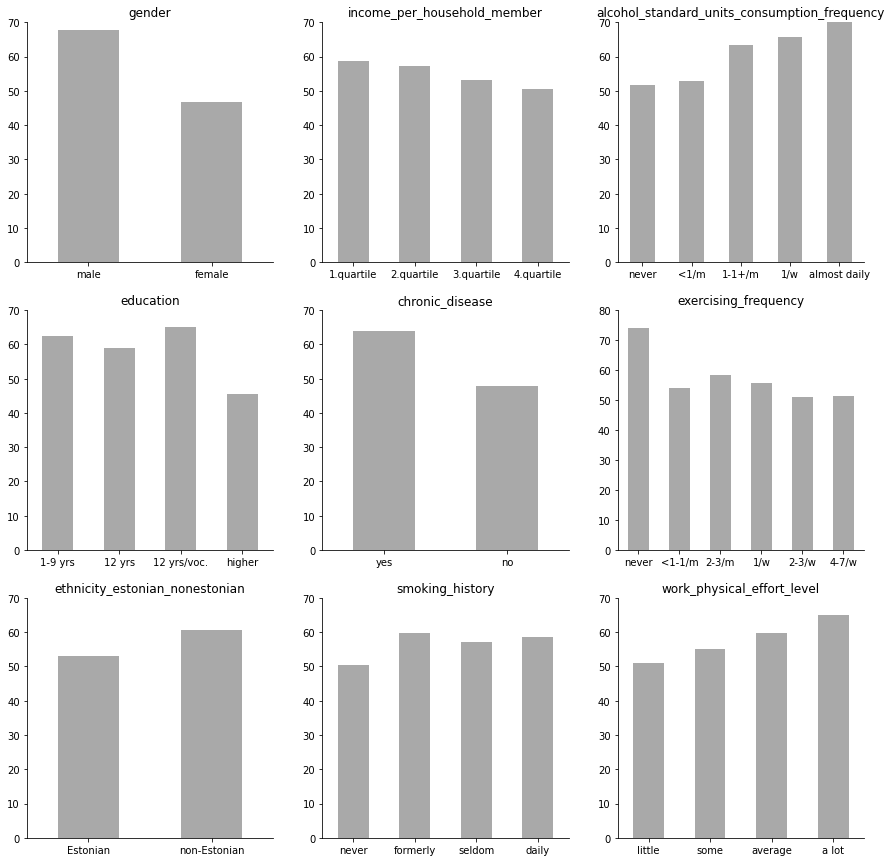

In [24]:
## different cateogries of respondents stratified by the proportion of those 
## who are overweight/obese (BMI ≥ 25.0)

## the plots show only "BMI ≥ 25.0" 


features=['gender',\
          'education',\
          'ethnicity_estonian_nonestonian',\
          'income_per_household_member',\
          'chronic_disease',\
          'smoking_history',\
          'alcohol_standard_units_consumption_frequency',\
          'exercising_frequency',\
          'work_physical_effort_level']

# värvid tulevad kordamööda, ei viitsi 9 eraldi värvi teha
colors = ['#A9A9A9','#FFFFFF']

# temporary dataframe to revers the stacks in the plot 
df_temp = df_2020
df_temp['bmi_two_groups_split25'] = df_temp['bmi_two_groups_split25'].replace([1],[3])

fig, axes = plt.subplots(nrows=3, ncols=3, figsize = (15,15))
sns.despine(top=True, right=True, left=False, bottom=False)


for i, item in enumerate(features):
    if i <3:    
        ax = df_temp.groupby(item).bmi_two_groups_split25.value_counts(normalize=True, ascending=True).\
        mul(100).round(4).unstack().plot(kind='bar', ax=axes[i,0],rot=0,color=colors, legend=0, stacked=True)
    
    elif i >=3 and i <6:       
        ax = df_temp.groupby(item).bmi_two_groups_split25.value_counts(normalize=True).\
        mul(100).round(4).sort_index(ascending=False).unstack().plot(kind='bar', ax=axes[i-3,1],rot=0,color=colors, legend=0, stacked=True) 
  
    elif i <9:
        ax = df_temp.groupby(item).bmi_two_groups_split25.value_counts(normalize=True).\
        mul(100).round(4).sort_index(ascending=True).unstack().plot(kind='bar', ax=axes[i-6,2],rot=0,color=colors, legend=0, stacked=True)

    
    ax.set(xlabel=None)
    ax.set_title(item)    
    #fig.legend([1,2], labels=['BMI≥30.0','BMI<30.0'], loc="lower center", fontsize = 15, bbox_to_anchor=(0.5,0))  
          

# changing the tick labels in all subplots
plt.sca(axes[0,0])
plt.xticks([0,1], ['male','female'])
plt.ylim(0, 70)

plt.sca(axes[0,1])
plt.xticks([0,1,2,3], ['1.quartile','2.quartile', '3.quartile', '4.quartile'])
plt.ylim(0, 70)

plt.sca(axes[0,2])
plt.xticks([0,1,2,3,4], ['never','<1/m','1-1+/m', '1/w', 'almost daily'])
plt.ylim(0, 70)

plt.sca(axes[1,0])
plt.xticks([0,1,2,3], ['1-9 yrs','12 yrs','12 yrs/voc.','higher'])
plt.ylim(0, 70)

plt.sca(axes[1,1])
plt.xticks([0,1], ['yes','no'])
plt.ylim(0, 70)

plt.sca(axes[1,2])
plt.xticks([0,1,2,3,4,5], ['never','<1-1/m', '2-3/m','1/w', '2-3/w','4-7/w'])
plt.ylim(0, 80)

plt.sca(axes[2,0])
plt.xticks([0,1], ['Estonian','non-Estonian'])
plt.ylim(0, 70)

plt.sca(axes[2,1])
plt.xticks([0,1,2,3], ['never','formerly','seldom','daily'])
plt.ylim(0, 70)

plt.sca(axes[2,2])
plt.xticks([0,1,2,3], ['little','some','average','a lot'])
plt.ylim(0, 70)

plt.savefig("C:/Users/Toomas/Desktop/ITMI_Data/Tables and graphs/25_64/EDA/category_subplots_split25.pdf")